## CUSTOMER LIFETIME VALUE

## Business Problem

### Background

Customer lifetime value adalah pengukuran berapa potensi revenue seorang pelanggan bagi sebuah perusahaan. Dari pengukuran tersebut perusahaan bisa menentukan *treatment* yang tepat bagi setiap pelanggan. Hal ini bertujuan memaksimalkan profit dari pelanggan juga efisiensi sumber daya yang dialokasikan untuk pelanggan.

Pada kasus ini, terdapat perusahaan asuransi yang bergerak di bidang otomotif. Perusahaan ini ingin menjawab isu-isu berikut:
1. Efisiensi biaya dan waktu di aktivitas marketing dan sales.
1. Menentukan strategi marketing dan sales lebih tepat sasaran.
1. Uplift nasabah *low value* menjadi nasabah *high value*.
1. Menentukan *treatment* yang tepat bagaimana meng-handle nasabah *high value* dan *low value*.

### Goals

Sebagai data scientist kita akan membantu perusahaan menajawab isu-isu terserbut dengan menggunakan metode machine learning. Kita akan gunakan supervised machine learning model regresi.

### Metric Evaluation

Metode pengukuran machine learning yang digunakan menggunakan RSME, MAE, dan MAPE. Pada model regresi ketiga pengukuran tersebut mampu mengintrepretasikan ketepatan model dalam memprediksi. RSME dipilih metode optimalisasi. MAE dan MAPE dipilih karena mudah diinterpretasikan.

$$RMSE =   \sqrt{ \frac{ \sum\nolimits_{i=1}^{n} ( Y_i - \widehat{Y_i})^2 }{n} } $$

$$MAE =  \frac{\sum\nolimits_{i=1}^{n} |Y_i - \widehat{Y_i}|}{n}$$

$$MAPE =  \frac{1}{n}   \sum_{i=1}^{n} | \frac{Y_i - \widehat{Y_i}}{Y_i}|$$

Keterangan:<br>
$n$ = Jumlah data<br>
$i$ = Variabel i<br>
$Y_i$ = Data aktual<br>
$\widehat{Y_i}$ = Data Prediksi

## Data Understanding
Sebelum membuat model machine learning dan melakukan prediksi, kita perlu mengenal dataset lebih dalam. Dari proses ini, kita akan tahu isi dan anomali apa saja yang terdapat di dalam dataset. Lalu penanganan yang tepat dalam tahapan *data cleaning*. Hal ini guna memastikan data dapat dipertanggung jawabkan dan menghasilkan prediksi yang tepat dan akurat.

Dataset yang digunakan dapat diakses [di sini](https://drive.google.com/drive/folders/1GR7l3uWmcOCA2sxx1W-cEkReDxdedoeJ?usp=sharing).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/rommy/Documents/DS/PWD/Modul 3/CAPSTONE/data_customer_lifetime_value.csv')
df.rename({'EmploymentStatus' : 'Employment Status'}, axis = 1, inplace = True)
display(df.head(), df.tail())

,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940
5668,Luxury SUV,Basic,Offer2,Employed,Divorced,College,1.0,199.0,161.615740,60184.0,7664.219255


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   Employment Status        5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


|Nama Kolom|Deskripsi|
|-|-|
|Vehicle Class|Tipe kendaraan nasabah|
|Coverage|Jenis asuransi kendaraan|
|Renew Offer Type|Jenis penawaran perpanjangan asuransi|
|Employment Status|Status pekerjaan nasabah|
|Marital Status|Status pernikahan nasabah|
|Education|Tingkat pendidikan nasabah|
|Number of Policies|Jumlah polis asuransi yang dipakai nasabah|
|Monthly Premium Auto|Premi asuransi bulanan yang dibayar nasabah|
|Total Claim Amount|Total klaim asuransi oleh nasabah|
|Income|Penghasilan nasabah|
|Customer Lifetime Value|Nilai yang mengukur potensi revenue dari nasabah|

Mengenai dataset:
1. Ada 11 kolom pada dataset ini. Kolom `Customer Lifetime Value` akan digunakan sebagai target dan 10 kolom lainnya akan menjadi feature.
1. Ada 7 kolom berisi data kategorik, yakni `Vehicle Class`, `Coverage`, `Renew Offer type`, `Employment Status`, `Marital Status`, `Education`, dan `Number of Policies`. Khusus kolom`Number of Policies` walaupun tipe datanya float(numerik) akan dianggap kategorik karena angka pada kolom itu merupakan jenis dari polis asuransi.
1. Lalu ada 4 kolom berisi data numerik, yakni `Monthly Premium Auto`, `Total Claim Amount`, `Income`, dan `Customer Lifetime Value`.

## Data Cleaning

Kualitas model yang dibuat tidak bisa lepas dari kualitas data yang disajikan, untuk itu kita akan memastikan data benar-benar bersih.

### Missing Value

In [4]:
df.isna().sum()/df.shape[0]*100

Vehicle Class              0.0
Coverage                   0.0
Renew Offer Type           0.0
Employment Status          0.0
Marital Status             0.0
Education                  0.0
Number of Policies         0.0
Monthly Premium Auto       0.0
Total Claim Amount         0.0
Income                     0.0
Customer Lifetime Value    0.0
dtype: float64

In [5]:
pd.set_option('display.max_colwidth', 130)
listItem = []

for i in df.columns :
    listItem.append([i, df[i].count(), df[i].nunique(), df[i].unique()])

df_desc = pd.DataFrame(columns = ['Column Name', 'Count', 'Unique', 'Samples'], data = listItem)
df_desc

,Column Name,Count,Unique,Samples
0,Vehicle Class,5669,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
1,Coverage,5669,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,5669,4,"[Offer1, Offer3, Offer2, Offer4]"
3,Employment Status,5669,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
4,Marital Status,5669,3,"[Divorced, Married, Single]"
5,Education,5669,5,"[High School or Below, College, Master, Bachelor, Doctor]"
6,Number of Policies,5669,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,Monthly Premium Auto,5669,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0, 63.0, 70.0, 71.0, 61.0, 64.0, 129.0, 100.0, 68.0, 126.0, 95.0, 128...."
8,Total Claim Amount,5669,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772, 582.781896, 39.781368, 2..."
9,Income,5669,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0, 59624.0, 37813.0, 35624.0, 24910.0, 62739.0,..."


Tidak ditemukan missing value di semua kolom pada dataset Customer Lifetime Value.

### Duplicate Data

In [6]:
df.duplicated(subset = ['Customer Lifetime Value']).sum()

np.int64(620)

In [7]:
df = df.drop_duplicates(subset = ['Customer Lifetime Value'], keep = 'first', inplace = False)

In [8]:
pd.set_option('display.max_colwidth', 130)
listItem = []

for i in df.columns :
    listItem.append([i, df[i].count(), df[i].nunique(), df[i].unique()])

df_desc = pd.DataFrame(columns = ['Column Name', 'Count', 'Unique', 'Samples'], data = listItem)
df_desc

,Column Name,Count,Unique,Samples
0,Vehicle Class,5049,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
1,Coverage,5049,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,5049,4,"[Offer1, Offer3, Offer2, Offer4]"
3,Employment Status,5049,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
4,Marital Status,5049,3,"[Divorced, Married, Single]"
5,Education,5049,5,"[High School or Below, College, Master, Bachelor, Doctor]"
6,Number of Policies,5049,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,Monthly Premium Auto,5049,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0, 63.0, 70.0, 71.0, 61.0, 64.0, 129.0, 100.0, 68.0, 126.0, 95.0, 128...."
8,Total Claim Amount,5049,3272,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772, 582.781896, 39.781368, 2..."
9,Income,5049,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0, 59624.0, 37813.0, 35624.0, 24910.0, 62739.0,..."


Ditemukan 620 data duplikat pada kolom `Customer Lifetime Value`. Setelah dicek nilai duplikatnya memang memiliki nilai duplikat pada kolom-kolom lain. Penangannya dengan menghapus data-data duplikat tersebut dan mempertahankan data pertama yang muncul. Sekarang tersisa 5049 baris dan 11 kolom pada dataset.

## Data Analysis

### Data Distribustion

Pertama kita bagi dataset berdasarkan tipe data menjadi kategorik dan numerik.

In [9]:
categoric = ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status', 'Marital Status', 'Education', 'Number of Policies']
numeric = ['Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Customer Lifetime Value']

Selanjutnya kita cek distribusi data pada data kategorik.

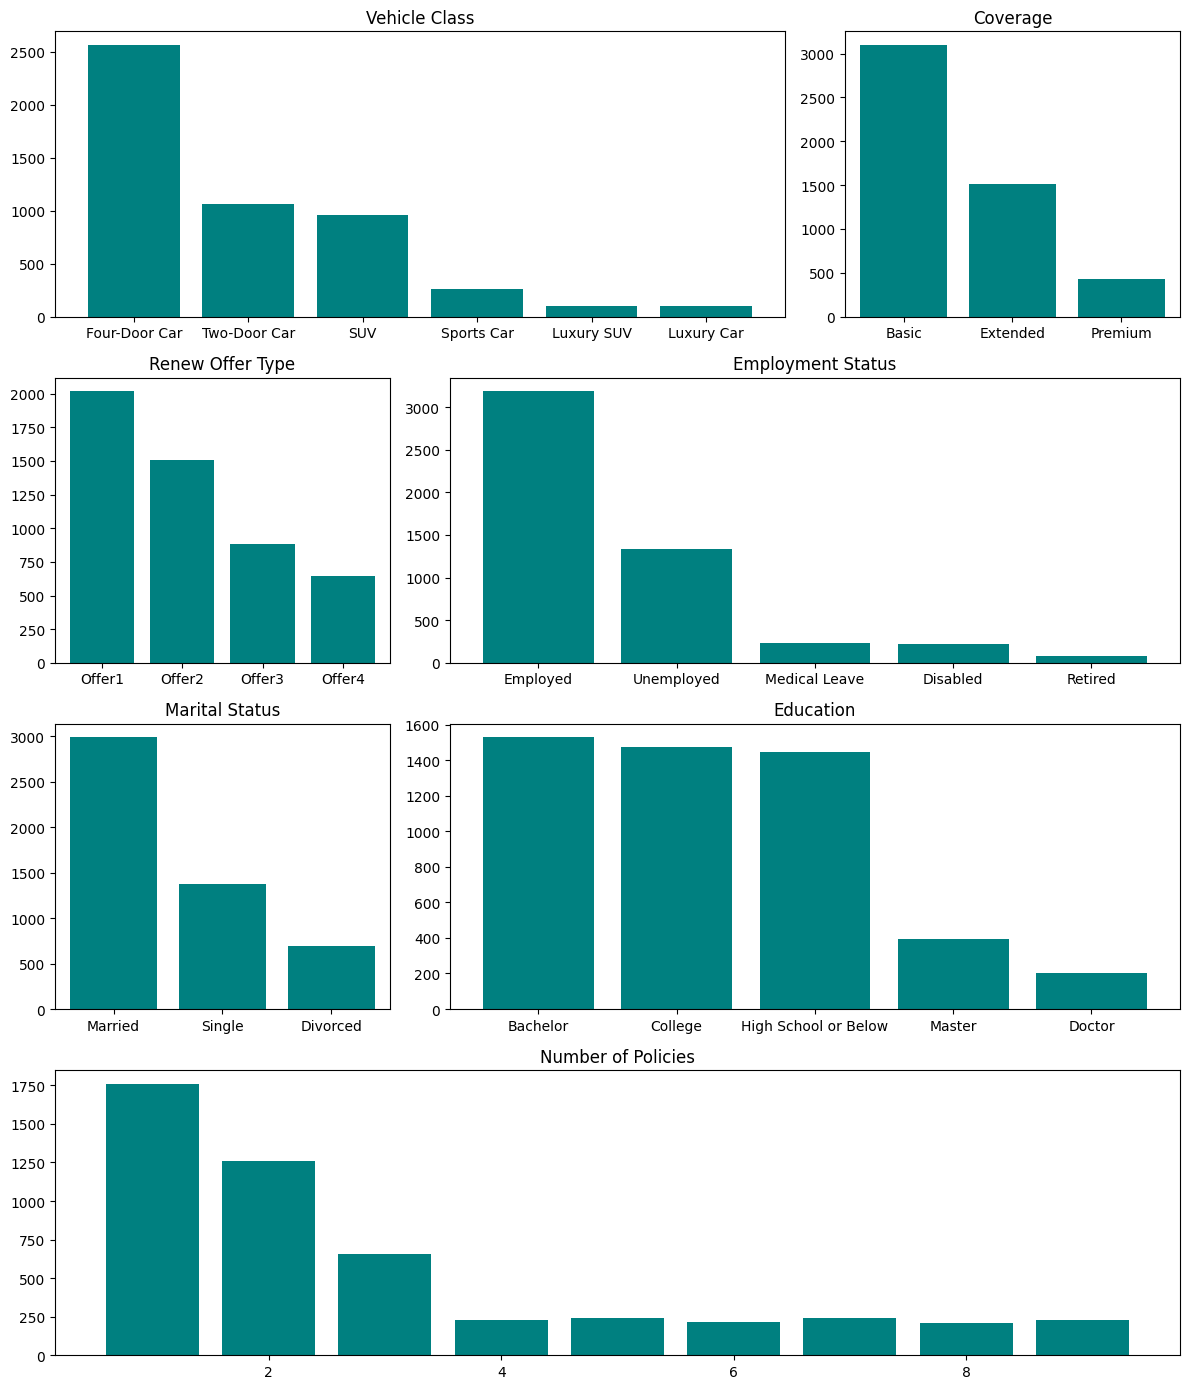

In [10]:
fig = plt.figure(figsize = (12,14))
grid_spec = fig.add_gridspec(4,3)

axis1 = fig.add_subplot(grid_spec[0, :2])
axis2 = fig.add_subplot(grid_spec[0, 2])
axis3 = fig.add_subplot(grid_spec[1, 0])
axis4 = fig.add_subplot(grid_spec[1, 1:])
axis5 = fig.add_subplot(grid_spec[2, 0])
axis6 = fig.add_subplot(grid_spec[2, 1:])
axis7 = fig.add_subplot(grid_spec[3, :])

sp = [axis1, axis2, axis3, axis4, axis5, axis6, axis7]

counter = 0
for i in categoric:
    bar = df[i].value_counts()
    sp[counter].bar(bar.index, bar.values, color = 'teal')
    counter = counter + 1

counter = 0
for i in categoric:
    sp[counter].set_title(i)
    counter = counter + 1

plt.tight_layout()
plt.show()

1. Pada kolom `Vehicle Class` terlihat kendaraan 4 pintu mendominasi jenis kendaraan para nasabah, disusul 2 pintu, lalu SUV, dst. Jumlah asuransi jenis kendaraan 4 pintu lebih dari dua kali jenis 2 pintu dan SUV.
1. Pada kolom `Coverage` terlihat jenis Basic paling banyak dibanding Extended dan Premium digabungkan.
1. Pada kolom `Renew Offer Type` terlihat paling banyak Offer1, disusul Offer2, dst.
1. Pada kolom `Employment Status` mayoritas nasabah orang yang bekerja.
1. Pada kolom `Marital Status` mayoritas nasabah telah menikah.
1. Pada kolom `Education` tingkat pendidikan Bachelor, College, High School jumlahnya hampir sama namun Master dan Doctor tidak banyak.
1. Pada kolom `Number of Policies` nasabah yg punya 1 dan 2 polis asuransi paling banyak.

Berikutnya kita cek distribusi data pada data numerik.

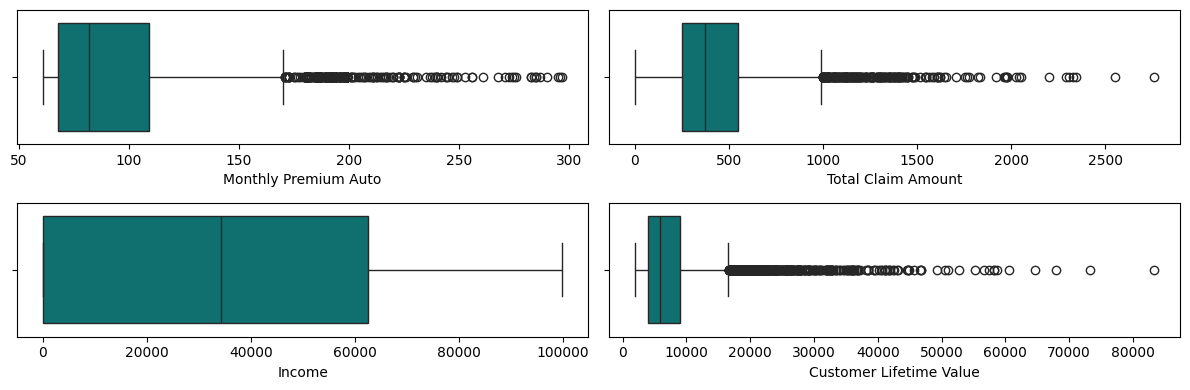

In [11]:
plt.figure(figsize = (12,4))
plotnumber = 1

for col in (x for x in df[numeric].describe().columns):
    ax = plt.subplot(2, 2, plotnumber)
    sns.boxplot(x = col, data = df, color = 'teal')
    plt.tight_layout()
    plotnumber = plotnumber + 1

plt.show()

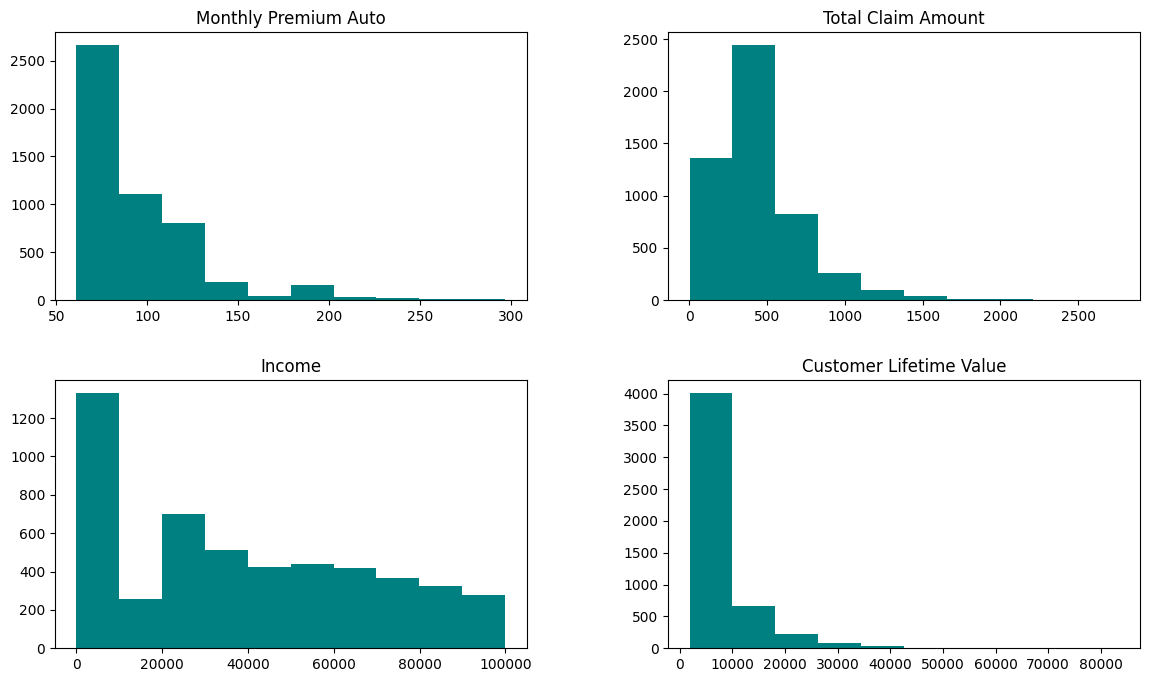

In [12]:
df[['Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Customer Lifetime Value']].hist(figsize = (14,8), grid = False, color = 'teal')
plt.show()

1. Keempat data numerik tidak terdistribusi normal dan semuanya right-skewed.
1. Terdapat sejumlah outliers pada kolom `Monthly Premium Auto`, `Total Claim Amount`, dan `Customer Lifetime Value`
1. Pada kolom `Monthly Premium Auto` premi yang dibayar nasabah paling banyak di rentang 50-100.
1. Pada kolom `Total Claim Amount` total klaim oleh nasabah paling banyak rentang 500-an.
1. Pada kolom `Income` nasabah yang tidak memiliki penghasilan mendominasi, sedangkan penghasilan rentang 40,000-100,000 angkanya cenderung sama.
1. Pada kolom `Customer Lifetime Value` mayoritas nasabah nilai Customer Lifetime Value di rentang 10,000-an.

### Data Correlation

Pada bagian ini kita akan cek korelasi antara data-data kategorik terhadap Customer Lifetime Value. Kita lakukan uji hipotesis dengan Kruskal-Wallis untuk tiap data kategorik terhadap Monthly Premium Auto dan Customer Lifetime Value.

In [13]:
from scipy.stats import kruskal

In [14]:
df.groupby('Vehicle Class')[['Monthly Premium Auto', 'Customer Lifetime Value']].median().sort_values('Customer Lifetime Value', ascending = False)

,Monthly Premium Auto,Customer Lifetime Value
Vehicle Class,,
Luxury SUV,199.0,15167.044020
Luxury Car,192.5,14510.597130
Sports Car,116.0,8774.738289
SUV,116.0,8613.464001
Four-Door Car,72.0,5324.387860
Two-Door Car,71.0,5225.658814


In [15]:
df.groupby('Coverage')[['Monthly Premium Auto', 'Customer Lifetime Value']].median().sort_values('Customer Lifetime Value', ascending = False)

,Monthly Premium Auto,Customer Lifetime Value
Coverage,,
Premium,114.0,8679.838135
Extended,92.0,6727.617003
Basic,70.0,5284.041003


In [16]:
kruskal(df[df['Coverage'] == 'Basic']['Customer Lifetime Value'],
        df[df['Coverage'] == 'Extended']['Customer Lifetime Value'],
        df[df['Coverage'] == 'Premium']['Customer Lifetime Value'])

KruskalResult(statistic=np.float64(309.8862086744084), pvalue=np.float64(5.117581613709639e-68))

In [17]:
df.groupby('Renew Offer Type')[['Monthly Premium Auto', 'Customer Lifetime Value']].median().sort_values('Customer Lifetime Value', ascending = False)

,Monthly Premium Auto,Customer Lifetime Value
Renew Offer Type,,
Offer1,90.0,6832.111972
Offer3,79.0,5757.489397
Offer2,78.0,5416.413581
Offer4,74.0,5222.656199


In [18]:
kruskal(df[df['Renew Offer Type'] == 'Offer1']['Customer Lifetime Value'],
        df[df['Renew Offer Type'] == 'Offer2']['Customer Lifetime Value'],
        df[df['Renew Offer Type'] == 'Offer3']['Customer Lifetime Value'],
        df[df['Renew Offer Type'] == 'Offer4']['Customer Lifetime Value'])

KruskalResult(statistic=np.float64(106.54593596802624), pvalue=np.float64(6.075369658122991e-23))

In [19]:
df.groupby('Employment Status')[['Monthly Premium Auto', 'Customer Lifetime Value']].median().sort_values('Customer Lifetime Value', ascending = False)

,Monthly Premium Auto,Customer Lifetime Value
Employment Status,,
Employed,81.0,5905.971667
Unemployed,83.0,5677.679980
Disabled,85.5,5577.569634
Medical Leave,81.0,5472.156984
Retired,84.5,5205.882185


In [20]:
kruskal(df[df['Employment Status'] == 'Disabled']['Customer Lifetime Value'],
        df[df['Employment Status'] == 'Employed']['Customer Lifetime Value'],
        df[df['Employment Status'] == 'Medical Leave']['Customer Lifetime Value'],
        df[df['Employment Status'] == 'Retired']['Customer Lifetime Value'],
        df[df['Employment Status'] == 'Unemployed']['Customer Lifetime Value'])

KruskalResult(statistic=np.float64(21.124888326139626), pvalue=np.float64(0.0002991151656354772))

In [21]:
df.groupby('Marital Status')[['Monthly Premium Auto', 'Customer Lifetime Value']].median().sort_values('Customer Lifetime Value', ascending = False)

,Monthly Premium Auto,Customer Lifetime Value
Marital Status,,
Married,81.0,5875.437263
Divorced,80.0,5823.162917
Single,83.0,5645.399349


In [22]:
kruskal(df[df['Marital Status'] == 'Divorced']['Customer Lifetime Value'],
        df[df['Marital Status'] == 'Married']['Customer Lifetime Value'],
        df[df['Marital Status'] == 'Single']['Customer Lifetime Value'])

KruskalResult(statistic=np.float64(4.600102047203109), pvalue=np.float64(0.10025372828601443))

In [23]:
df.groupby('Education')[['Monthly Premium Auto', 'Customer Lifetime Value']].median().sort_values('Customer Lifetime Value', ascending = False)

,Monthly Premium Auto,Customer Lifetime Value
Education,,
Master,84.0,6135.083838
High School or Below,84.0,6044.020038
College,82.0,5757.489397
Bachelor,80.0,5745.121547
Doctor,78.0,5704.977144


In [24]:
kruskal(df[df['Education'] == 'Bachelor']['Customer Lifetime Value'],
        df[df['Education'] == 'College']['Customer Lifetime Value'],
        df[df['Education'] == 'Doctor']['Customer Lifetime Value'],
        df[df['Education'] == 'High School or Below']['Customer Lifetime Value'],
        df[df['Education'] == 'Master']['Customer Lifetime Value'])

KruskalResult(statistic=np.float64(7.865084084487535), pvalue=np.float64(0.09664724681691736))

Uji statistik pada data kategorik menemukan bahwa `Employment Status` berpengaruh terhadap `Customer Lifetime Value` yang dibuktikan dengan nilai p-value sebesar 0.0002. Feature kategorik lainnya tidak memiliki pengaruh yang signifikan.

In [26]:
df.groupby('Number of Policies')[['Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Customer Lifetime Value']].median()

,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
Number of Policies,,,,
1.0,80.0,374.400000,34080.0,3059.182181
2.0,82.0,365.080714,34043.5,12986.902435
3.0,84.0,377.917394,36881.0,6347.497519
4.0,84.0,391.039166,33137.0,6333.030812
5.0,78.5,388.011278,36650.0,6063.392804
6.0,81.5,345.600000,40921.5,6282.750917
7.0,83.0,398.400000,30735.0,6418.248710
8.0,81.0,409.868003,31756.0,6042.911900
9.0,80.5,369.942675,32528.0,6225.781965


Median Customer Lifetime Value nasabah dengan 2 polis asuransi nilainya paling tinggi 12986.90 disusul nasabah dengan 3-9 polis di rentang 6000-6500 lalu nasabah dengan 1 polis hanya 3059.18. Kemungkinan feature ini berpengaruh. Selanjutnya kita buktikan dengan uji statistik.

In [27]:
var_num_of_policies = ['Monthly Premium Auto', 'Total Claim Amount', 'Income']

kruskal(df[df['Number of Policies'] == 1][var_num_of_policies],
        df[df['Number of Policies'] == 2][var_num_of_policies],
        df[df['Number of Policies'] == 3][var_num_of_policies],
        df[df['Number of Policies'] == 4][var_num_of_policies],
        df[df['Number of Policies'] == 5][var_num_of_policies],
        df[df['Number of Policies'] == 6][var_num_of_policies],
        df[df['Number of Policies'] == 7][var_num_of_policies],
        df[df['Number of Policies'] == 8][var_num_of_policies],
        df[df['Number of Policies'] == 9][var_num_of_policies])

KruskalResult(statistic=array([ 5.50032908,  7.13981443, 14.34035596]), pvalue=array([0.70300353, 0.52162574, 0.07331427]))

Jumlah polis asuransi ternyata tidak punya pengaruh yang dibuktikan dengan hasil uji statistik di atas, di mana nilai p-value > 0.05. `Monthly Premium Auto` sebesar **0.70**. `Total Claim Amount` sebesar **0.52**. `Income` sebesar **0.07**.

Selanjutnya kita cek korelasi antar data-data numerik.

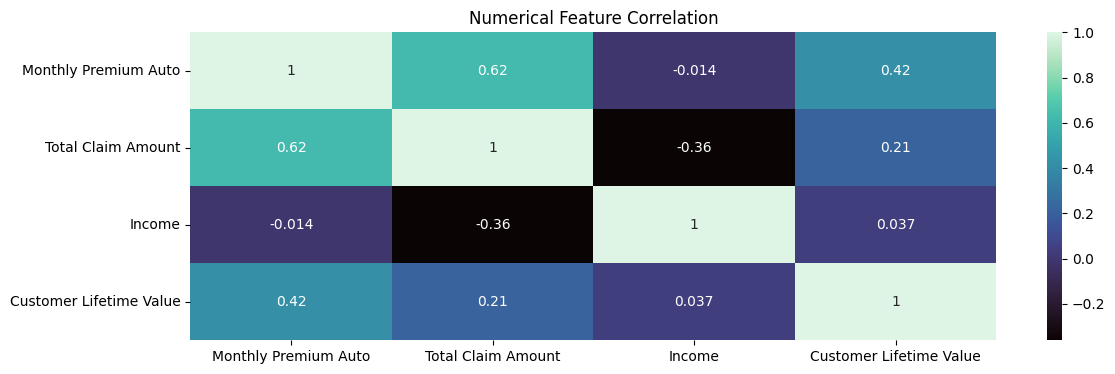

In [28]:
plt.figure(figsize = (13,4))
sns.heatmap(df[numeric].corr(), annot = True, cmap = 'mako')
plt.title('Numerical Feature Correlation', size = 12)
plt.show()

Pada data numerik ditemukan bahwa `Monthly Premium Auto` punya pengaruh paling kuat dengan `Customer Lifetime Value` di angka **0.42** lalu disusul `Total Claim Amount` dengan **0.21**. Sedangkan `Income` hanya **0.037** hal bisa saja terjadi karena nasabah yang punya income besar membayar premi bulanan yang kecil namun bisa juga nasabah yang punya income kecil banyak membayar premi bulanan lebih besar.

### Data Outliers and Handling

Pada bagian akan dilakukan cek outliers pada data numerik.

In [29]:
def check_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr * 1.5
    
    print(f'IQR: {iqr}')

    global lower_limit, upper_limit

    lower_limit = q1 - limit
    upper_limit = q3 + limit
    
    print(f'Batas bawah: {lower_limit} \nBatas atas: {upper_limit}')

In [30]:
check_outliers(df['Monthly Premium Auto'])

IQR: 41.0
Batas bawah: 6.5 
Batas atas: 170.5


In [31]:
check_outliers(df['Total Claim Amount'])

IQR: 296.1558369999999
Batas bawah: -192.47701649999985 
Batas atas: 992.1463314999999


In [32]:
check_outliers(df['Customer Lifetime Value'])

IQR: 5063.577117
Batas bawah: -3630.6349304999994 
Batas atas: 16623.6735375


Selanjutnya kita akan cek metode handling yang paling tepat untuk tiap data numerik. Memastikan bila ada data outliers yang dihapus tidak menyebabkan bias dan data hilang secara signifikan. Kita akan gunakan data kategorik `Vehicle Class` yang merupakan kolom pertama dari dataset.

In [33]:
df.groupby('Vehicle Class')['Monthly Premium Auto'].describe().sort_values('count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Vehicle Class,,,,,,,,
Four-Door Car,2565.0,77.020663,14.142962,61.0,66.0,72.0,86.0,119.0
Two-Door Car,1058.0,76.684310,14.423535,61.0,66.0,71.0,86.0,119.0
SUV,963.0,120.860852,18.966141,100.0,108.0,116.0,129.0,199.0
Sports Car,262.0,122.190840,19.335559,100.0,109.0,116.0,132.0,199.0
Luxury SUV,101.0,209.386139,27.256181,180.0,192.0,199.0,219.0,287.0
Luxury Car,100.0,207.310000,30.705409,180.0,187.0,192.5,223.0,297.0


Bila kita menghapus outliers pada `Monthly Premium Auto` yang melewati batas atas 170.5 data Luxury Car dan Luxury SUV akan hilang dari data `Vehicle Class`. Sedangkang SUV dan Sports Car akan hilang pada percentile > 75%. Ini akan menyebabkan bias di mana data akan cenderung menunjukkan kelas yang lebih rendah. Oleh karena itu kita tidak akan menghapus outliers pada kolom ini.

In [34]:
df.groupby('Vehicle Class')['Total Claim Amount'].describe().sort_values('count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Vehicle Class,,,,,,,,
Four-Door Car,2565.0,346.106756,198.864261,0.423310,208.885686,336.000000,454.358500,1310.461580
Two-Door Car,1058.0,347.827777,193.854190,1.332349,230.382945,336.000000,456.495956,1261.943541
SUV,963.0,573.174610,289.953148,0.517753,412.467956,556.800000,734.400000,1654.202174
Sports Car,262.0,550.563401,299.232668,5.573179,343.433805,556.800000,706.592595,1516.383753
Luxury SUV,101.0,1059.876385,518.991688,1.587888,825.657746,998.400000,1328.839129,2552.343856
Luxury Car,100.0,1095.529039,514.575160,32.874675,872.400000,1005.884899,1385.975591,2759.794354


Bila kita menghapus outliers pada `Total Claim Amount` yang melewati batas atas 992.1 tidak ada kategori yang hilang. Akan tetapi data pada Luxury SUV dan Luxury Car data yang hilang melebihi 50%. Tidak ada kelas kendaraan yang hilang tapi terlalu banyak data yang hilang. Oleh sebab itu kita tidak akan menghapus outliers pada kolom ini.

In [35]:
df.groupby('Vehicle Class')['Customer Lifetime Value'].describe().sort_values('count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Vehicle Class,,,,,,,,
Four-Door Car,2565.0,6617.086575,5039.740802,1904.000852,3189.667030,5324.387860,7648.25947,41787.90343
Two-Door Car,1058.0,6661.916104,5311.753062,1898.007675,2972.054489,5225.658814,7591.38290,35444.31404
SUV,963.0,10501.784338,7921.417848,3099.538005,4906.467977,8613.464001,12116.87046,58753.88046
Sports Car,262.0,11543.506772,9219.335755,3074.105486,5280.228129,8774.738289,12597.75918,67907.27050
Luxury SUV,101.0,18587.427902,13847.915632,6383.611136,8427.172486,15167.044020,20552.62128,73225.95652
Luxury Car,100.0,16610.562619,12368.973750,5886.221122,7780.298646,14510.597130,18157.73603,83325.38119


Bila kita menghapus outliers pada `Customer Lifetime Value` yang melewati batas atas 16623.6 tidak ada kategori yang hilang. Data yang tersisa pun masih cukup banyak. Oleh sebab itu kita akan menghapus outliers pada kolom ini.

In [36]:
df[df['Customer Lifetime Value'] > upper_limit]['Customer Lifetime Value'].count()

np.int64(449)

Ditemukan sebanyak 449 data outliers pada `Customer Lifetime Value`. Untuk handlingnya kita akan hapus data-data outliers tersebut karena jumlahnya hanya 8.8% dari total data pada dataset ini.

In [37]:
df_new = df[df['Customer Lifetime Value'] <= upper_limit]

In [38]:
pd.set_option('display.max_colwidth', 130)
listItem = []

for i in df_new.columns :
    listItem.append([i, df_new[i].count(), df_new[i].nunique(), df_new[i].unique()])

df_desc = pd.DataFrame(columns = ['Column Name', 'Count', 'Unique', 'Samples'], data = listItem)
df_desc

,Column Name,Count,Unique,Samples
0,Vehicle Class,4600,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
1,Coverage,4600,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,4600,4,"[Offer1, Offer3, Offer2, Offer4]"
3,Employment Status,4600,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
4,Marital Status,4600,3,"[Divorced, Married, Single]"
5,Education,4600,5,"[High School or Below, College, Master, Bachelor, Doctor]"
6,Number of Policies,4600,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,Monthly Premium Auto,4600,160,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0, 63.0, 70.0, 71.0, 61.0, 64.0, 129.0, 100.0, 68.0, 126.0, 95.0, 128...."
8,Total Claim Amount,4600,2977,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772, 582.781896, 39.781368, 3..."
9,Income,4600,3309,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0, 59624.0, 37813.0, 24910.0, 62739.0, 18608.0,..."


Setelah data outliers kita hapus sekarang tersisa 4.600 baris dari dataset. Selanjutnya kita akan membandingkan dan menganalisa dataset sebelum dan sesudah outliers handling untuk memastikan tidak ada bias pada dataset.

Kita akan membandingkan `Monthly Premium Auto` karena pada hasil uji statistik pengaruhnya paling besar terhadap `Customer Lifetime Value`.

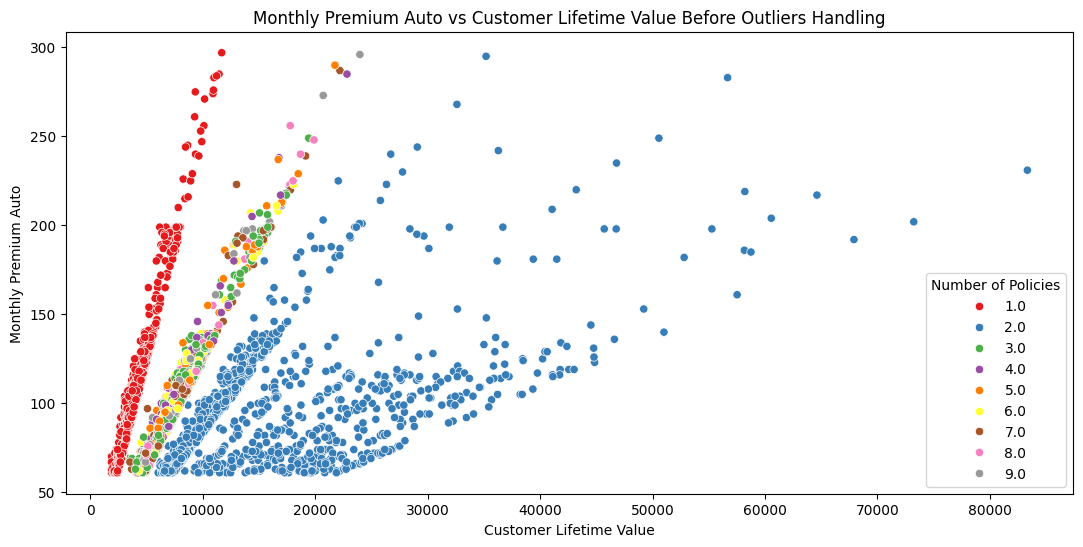

In [39]:
plt.figure(figsize = (13,6))
sns.scatterplot(data = df, y = 'Monthly Premium Auto', x = 'Customer Lifetime Value', palette = 'Set1', hue = 'Number of Policies')
plt.title('Monthly Premium Auto vs Customer Lifetime Value Before Outliers Handling', size = 12)
plt.show()

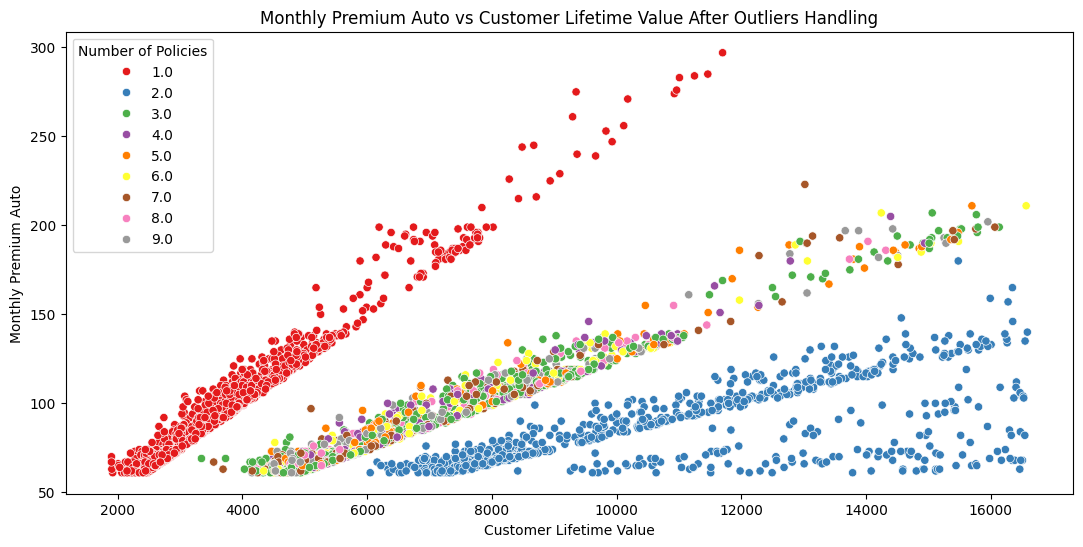

In [40]:
plt.figure(figsize = (13,6))
sns.scatterplot(data = df_new, y = 'Monthly Premium Auto', x = 'Customer Lifetime Value', palette = 'Set1', hue = 'Number of Policies')
plt.title('Monthly Premium Auto vs Customer Lifetime Value After Outliers Handling', size = 12)
plt.show()

In [41]:
print('Sebelum Outliers Handling')
display(df[numeric].describe())

print('Setelah Outliers Handling')
display(df_new[numeric].describe())

Sebelum Outliers Handling


,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5049.000000,5049.000000,5049.000000,5049.000000
mean,92.884135,429.506991,37754.787879,8060.435309
std,34.262906,292.411096,30688.335107,6990.074953
min,61.000000,0.423310,0.000000,1898.007675
25%,68.000000,251.756739,0.000000,3964.730745
50%,82.000000,374.400000,34335.000000,5837.528088
75%,109.000000,547.912576,62473.000000,9028.307862
max,297.000000,2759.794354,99934.000000,83325.381190


Setelah Outliers Handling


,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,4600.000000,4600.000000,4600.000000,4600.000000
mean,90.553913,419.779569,37604.177826,6325.475192
std,30.752138,278.553943,30662.489550,3320.464907
min,61.000000,0.423310,0.000000,1898.007675
25%,68.000000,251.420679,0.000000,3711.143451
50%,80.000000,369.716719,34154.500000,5505.112198
75%,107.000000,541.710582,62232.000000,8169.379630
max,297.000000,2759.794354,99934.000000,16589.712370


Tidak banyak perubahan rentang data numerik yang menjadi feature. Maka untuk model machine learning kita gunakan dataset setelah dilakukan outliers handling.

## Feature Selection

Data set akan dibagi menjadi 2, yakni data train dan data test. Data train akan digunakan untuk melatih model machine learning. Data test digunakan untuk menguji apakah model mampu memberikan prediksi yang tepat. Komposisi data train dan data test adalah 70% berbanding 30%.

In [42]:
x = df_new.drop('Customer Lifetime Value', axis = 1)
y = df_new['Customer Lifetime Value']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 1919)

## Feature Engineering

### Data Preprocessing

Untuk mendapat hasil prediksi terbaik dataset tidak bisa langsung digunakan karena ada 2 tipe data pada dataset yakni data kategorik dan numerik. Dari hasil uji statistik data kategorik yang punya pengaruh kuat terhadap `Customer Lifetime Value` adalah `Employment Status`. Sedangkan data kategorik lainnya pengaruhnya lemah. Untuk data numerik ada `Monthly Premium Auto` dan `Total Claim Amount`. Kita putuskan untuk tetap menggunakan seluruh data baik kategorik maupun numerik.

Oleh karena itu kita akan menyelaraskan seluruh data pada feature dengan melakukan encoding. `Vehicle Class`, `Employment Status`, dan `Marital Status` menggunakan OneHot sedangkan `Coverage`, `Renew Offer Type`, dan `Education` menggunakan Ordinal. Pada feature yang menggunakan metode Ordinal akan kita lakukan mapping terlebih dulu.

In [45]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce

In [46]:
coverage_mapping = [{'col': 'Coverage', 'mapping': {None: 0, 'Basic': 1, 'Extended': 2, 'Premium': 3}}]
renew_offer_type_mapping = [{'col': 'Renew Offer Type', 'mapping': {None: 0, 'Offer1': 1,'Offer2': 2, 'Offer3': 3, 'Offer4': 4}}]
education_mapping = [{'col': 'Education', 'mapping': {None: 0, 'High School or Below': 1, 'College': 2, 'Bachelor': 3, 'Master': 4, 'Doctor': 5}}]

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop = 'first'), ['Vehicle Class', 'Employment Status', 'Marital Status']),
    ('coverage_ordinal', ce.OrdinalEncoder(mapping = coverage_mapping), ['Coverage']),
    ('renew_offer_type_ordinal', ce.OrdinalEncoder(mapping = renew_offer_type_mapping), ['Renew Offer Type']),
    ('education_ordinal', ce.OrdinalEncoder(mapping = education_mapping), ['Education'])], remainder = 'passthrough')

Berikutnya kita buat kolom transformer agar mudah menginterpretasikan nama kolom setelah proses encoding. 

In [47]:
transformer_col = pd.DataFrame(transformer.fit_transform(x))
transformer_col

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,90.0,571.479602,11828.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,6.0,62.0,114.514440,44762.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0,2.0,62.0,257.248789,21514.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,1.0,1.0,116.0,556.800000,17913.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,1.0,1.0,62.0,355.820799,19030.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,69.0,446.084760,30595.0
4596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,4.0,1.0,1.0,74.0,532.800000,0.0
4597,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,2.0,109.0,523.200000,27778.0
4598,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,62.0,44.780402,84658.0


### Model Benchmarking

Kita akan melakukan cross validation pada data train. Cross validation dilakukan dengan membagi data train menjadi 5 model, karena kita akan menggunakan 5 model. 4 data diambil untuk di train menggunakan model lalu hasilnya dihitung menggunakan data sisanya. Semua data test akan diulang sehingga seluruh data test pernah menjadi data validasi. Nilai rata-rata dan standar deviasi dari masing-masing model akan dibandingkan untuk menentukan model terbaik.

Kita tentukan model yang akan kita gunakan yakni: **Linear Regression**, **KNN**, **Decision Tree**, **Random Forest**, dan **Xtreme Gradient Boosting**.

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

In [49]:
linear_regression = LinearRegression()
knn = KNeighborsRegressor(n_neighbors = 13)
knn_scaler = ColumnTransformer([ ('MinMax', MinMaxScaler(), [15, 16, 17])], remainder = 'passthrough') # 15, 16, 17 data numerik di kolom transformer
knn_plus = Pipeline([('scaler', knn_scaler), ('knn', knn)])

decision_tree = DecisionTreeRegressor(max_depth = 5, random_state = 1919)
random_forest = RandomForestRegressor(max_depth = 5, random_state = 1919, max_features = 'log2')
xg_boost = XGBRegressor(max_depth = 5, random_state = 1919)

Selanjutnya kita lakukan cross validation pada model-model yang sudah dipilih. Untuk pengukuran best estimator kita gunakan RMSE.

In [50]:
from sklearn.model_selection import KFold, GridSearchCV

In [51]:
hyperparam = {'model': [linear_regression, knn_plus, decision_tree, random_forest, xg_boost]}

estimator = Pipeline([('preprocess', transformer), ('model', linear_regression)])

cross_validation = KFold(n_splits = 5, shuffle = True, random_state = 1919)

grid_search_cv = GridSearchCV(estimator,
                              param_grid = hyperparam,
                              cv = cross_validation,
                              scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
                              refit = 'neg_root_mean_squared_error',
                              n_jobs = -1)

grid_search_cv.fit(xtrain, ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=1919, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Employment '
                                                                          'Status',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('coverage_ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mappin...
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=5, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=None, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=1919, ...)]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

## Analytics

### Cross Validation

Kita tampilkan hasil cross validation menggunakan evaluation metrics pada model-model yang sudah kita pilih. Lalu diurutkan berdasarkan peringkat RMSE.

In [52]:
cross_validation_columns = ['Rank', 'Model Before Tuning', 'Mean RMSE', 'STD RMSE', 'Mean MAE', 'STD MAE', 'Mean MAPE', 'STD MAPE']

cros_validation_result = pd.DataFrame(grid_search_cv.cv_results_)[['rank_test_neg_root_mean_squared_error',
                                                                   'param_model',
                                                                   'mean_test_neg_root_mean_squared_error',
                                                                   'std_test_neg_root_mean_squared_error',
                                                                   'mean_test_neg_mean_absolute_error',
                                                                   'std_test_neg_mean_absolute_error',
                                                                   'mean_test_neg_mean_absolute_percentage_error',
                                                                   'std_test_neg_mean_absolute_percentage_error']]

cros_validation_result.columns = cross_validation_columns
cros_validation_result.set_index('Rank', inplace = True)
cros_validation_result.sort_index()

,Model Before Tuning,Mean RMSE,STD RMSE,Mean MAE,STD MAE,Mean MAPE,STD MAPE
Rank,,,,,,,
1,"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n ...",-1024.123261,48.611536,-490.917373,18.417578,-0.073737,0.002094
2,"DecisionTreeRegressor(max_depth=5, random_state=1919)",-1054.398879,60.502585,-553.475681,23.307334,-0.074850,0.001707
3,"RandomForestRegressor(max_depth=5, max_features='log2', random_state=1919)",-1688.314796,99.128130,-1129.675805,51.902093,-0.197526,0.004022
4,"(ColumnTransformer(remainder='passthrough',\n transformers=[('MinMax', MinMaxScaler(), [15, 16, 17])]), KNeig...",-2067.949776,65.348362,-1252.773184,30.330915,-0.180950,0.004356
5,LinearRegression(),-2790.907906,115.316905,-2097.637598,67.555641,-0.383777,0.008772


Dari hasil cross validation Xtreme Gradient Boosting menunjukkan nilai rata-rata RMSE, MAE, dan MAPE paling rendah dari semua model. Maka **Xtreme Gradient Boosting** kita pilih sebagai final model.

### Evaluation Metrics

Kita gunakan **RMSE**, **MAE**, dan **MAPE** sebagai evaluation metrics untuk mengukur seberapa bagus model yang kita pilih.

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [54]:
xg_boost = XGBRegressor(max_depth = 3, random_state = 1919)
estimator = Pipeline([('transformer', transformer), ('model', xg_boost)])

estimator.fit(xtrain, ytrain)
ypred = estimator.predict(xtest)

In [55]:
def regression_score(model_name, test, pred):
    rmse = np.sqrt(mean_squared_error(test, pred))
    mae = mean_absolute_error(test, pred)
    mape = mean_absolute_percentage_error(test, pred)
    return pd.DataFrame({'RMSE': rmse, 'MAE': mae, 'MAPE': mape}, index = [model_name])

regression_score('Xtreme Gradient Boosting', ytest, ypred)

,RMSE,MAE,MAPE
Xtreme Gradient Boosting,897.178197,439.660865,0.065288


Terlihat RMSE **897.17** MAE **439.66** MAPE **6.52%**. Hasil yang cukup baik. Selanjutnya kita akan lakukan hyperparameter tuning untuk mendapat hasil yang lebih baik.

### Hyperparameter Tuning

Ada 3 paramater Xtreme Gradient Boosting yang akan kita modifikasi pada saat melakukan hyperparameter tuning. Parameter tersebut adalah:

|Parameter|Deskripsi|
|--|--|
|learning_rate|Besarnya beban yang ditambahkan setiap pohon keputusan baru dibuat|
|n_estimators|Banyaknya pohon yang akan dibuat|
|max_depth|Kedalaman pohon keputusan|

Selanjutnya kita kita tentukan nilai dari masing-masing parameter yang akan dilakukan tuning.

In [56]:
hyperparam = [{'model__learning_rate': [1, 0.2, 0.1, 0.05, 0.02, 0.005, 0.002],
               'model__n_estimators': [20, 100, 200, 400, 800, 1000, 1200],
               'model__max_depth': [3, 4, 5, 6, 7, 8]}]

In [57]:
grid_search_cv = GridSearchCV(estimator,
                              param_grid = hyperparam,
                              cv = cross_validation,
                              scoring = 'neg_root_mean_squared_error',
                              n_jobs = -1)

In [58]:
grid_search_cv.fit(xtrain, ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=1919, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Employment '
                                                                          'Status',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('coverage_ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mappi...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=1919, ...))]),
             n_jobs=-1,
             param_grid=[{'model__learning_rate': [1, 0.2, 0.1, 0.05, 0.02,
                                                   0.005, 0.002],
                          'model__max_depth': [3, 4, 5, 6, 7, 8],
                          'model__n_estimators': [20, 100, 200, 400, 800, 1000,
                                                  1200]}],
             scoring='neg_root_mean_squared_error')

In [59]:
pd.DataFrame(grid_search_cv.cv_results_)[['params', 'mean_fit_time', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score').head()

,params,mean_fit_time,mean_test_score,std_test_score,rank_test_score
222,"{'model__learning_rate': 0.005, 'model__max_depth': 4, 'model__n_estimators': 1000}",0.463326,-932.076865,51.431554,1
134,"{'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 100}",0.068875,-932.376282,52.715527,2
223,"{'model__learning_rate': 0.005, 'model__max_depth': 4, 'model__n_estimators': 1200}",0.585512,-932.470889,52.821325,3
171,"{'model__learning_rate': 0.02, 'model__max_depth': 3, 'model__n_estimators': 400}",0.140706,-933.993696,40.722813,4
128,"{'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 200}",0.088974,-935.668375,40.654292,5


Setelah dilakukan hyperparameter tuning, hasil terbaik dari Xtreme Gradient Boosting adalah dengan paramater-parameter berikut:
|Parameter|Nilai|
|-|-|
|learning_rate|0.005|
|max_depth|4|
|n_estimator|1000|

## Model Evaluation
### Prediction with Tuned Model
Kita akan melakukan prediksi dengan model yang sudah dilakukan hyperparameter tuning dan membandingkannya dengan model sebelum dilakukan tuning.

In [60]:
model_after_tuning = grid_search_cv.best_estimator_
model_after_tuning.fit(xtrain, ytrain)
ypred_after_tuning = model_after_tuning.predict(xtest)

display(regression_score('Before Tuning', ytest, ypred), regression_score('After Tuning', ytest, ypred_after_tuning))

,RMSE,MAE,MAPE
Before Tuning,897.178197,439.660865,0.065288


,RMSE,MAE,MAPE
After Tuning,851.126398,344.54676,0.044219


Setelah dilakukan tuning terlihat sejumlah perbaikan. RSME turun **46.05**. MAE turun **95.11**. MAPE turun **2.10%**. Hasil tuning yang sangat baik karena potensi eror semakin kecil. Model setelah tuning akan digunakan sebagai model machine learning final.

### Feature Importance

Pertama kita cek *importance* dari masing-masing feature pada model.

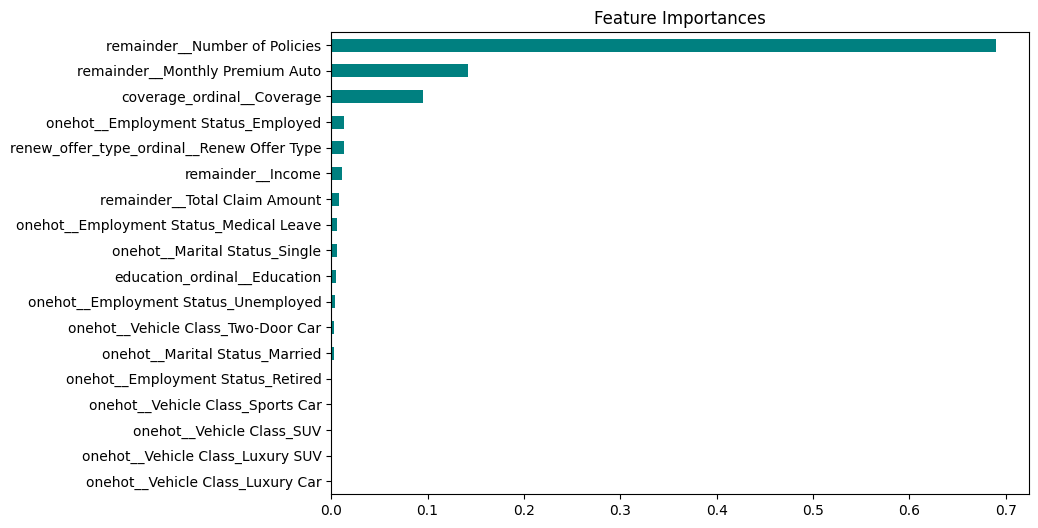

In [61]:
feature_importance = pd.Series(model_after_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = True)

plt.figure(figsize = (9,6))
feature_importance.plot(kind = 'barh', title = 'Feature Importances', color = 'teal')
plt.show()

Dari barplot di atas diketahui `Number of Policies` merupakan feature paling berpengaruh. Disusul `Coverage` dan `Monthly Premium Auto`. Feature lainnya tidak punya pengaruh yang kuat. Hal ini lurus dengan uji statistik yang sudah dilakukan sebelumnya.

### Residual Value
Selanjutnya kita bandingkan hasil prediksi dengan angka sebenarnya. Hal ini bertujuan mengukur kualitas model yang sudah kita buat. Pertama dengan scatter plot.

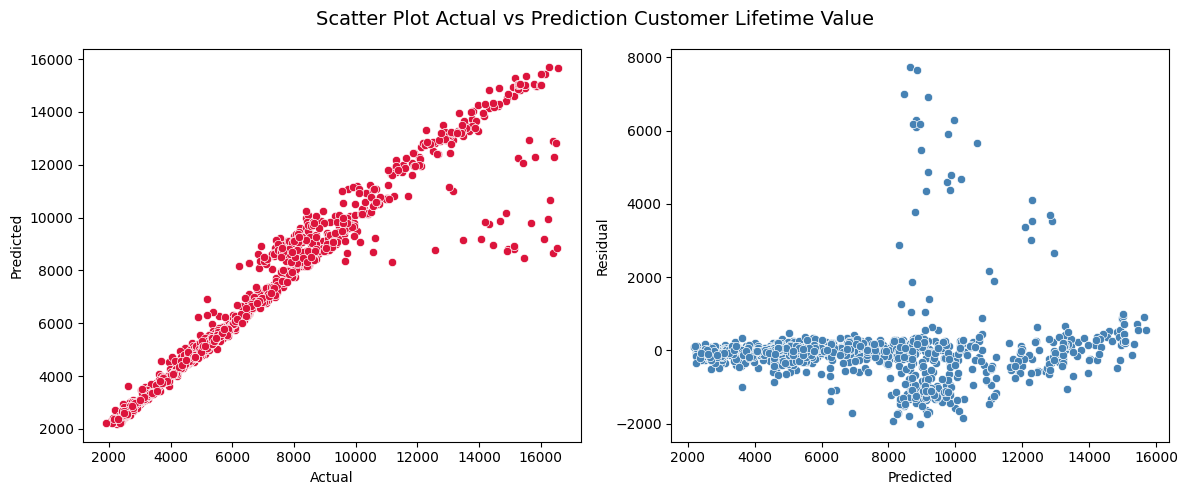

In [62]:
fig, axs =  plt.subplots(1, 2, figsize = (12,5))

sns.scatterplot(y = ypred_after_tuning, x = ytest, ax = axs[0], color = 'crimson')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')

sns.scatterplot(x = ypred_after_tuning, y = ytest - ypred_after_tuning, ax = axs[1], color = 'steelblue')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Residual')

fig.suptitle('Scatter Plot Actual vs Prediction Customer Lifetime Value', size = 14)
fig.tight_layout()

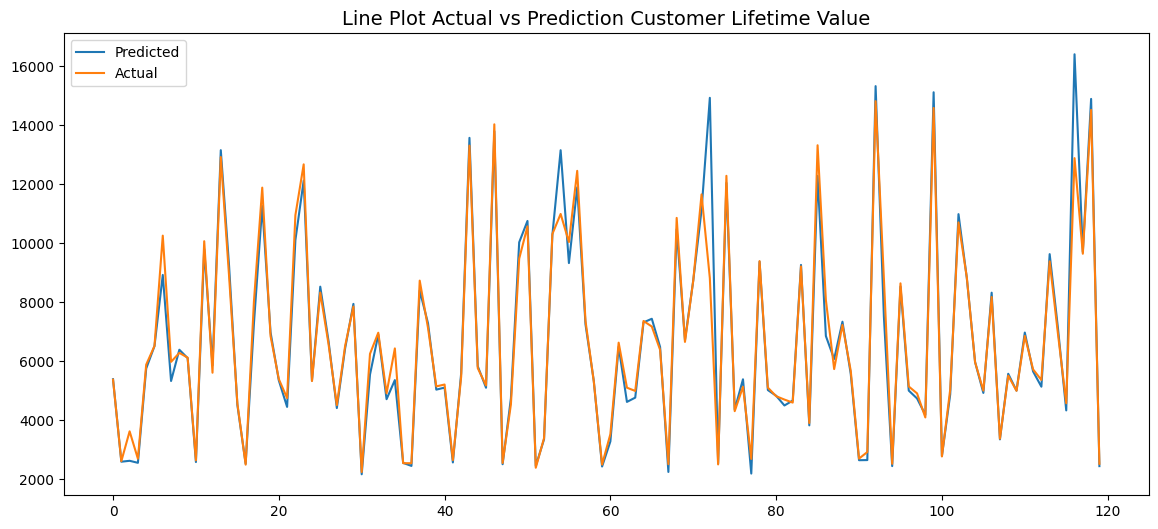

In [63]:
test = pd.DataFrame({'Actual':ytest, 'Predicted':ypred_after_tuning})

fig = plt.figure(figsize = (14,6))
test = test.reset_index()
test = test.drop(['index'],axis = 1)

plt.plot(test[:120])
plt.title('Line Plot Actual vs Prediction Customer Lifetime Value', size = 14)
plt.legend(['Predicted','Actual'])

plt.show()

Dari plot scatter dan line di atas dapat dilihat model mampu memeprediksi dengan tepat. Tapi pada Customer Lifetime Value dengan nilai > 8000 model tidak dapat memprediksi dengan tepat. Prediksi pada Customer Lifetime Value > 8000 model cenderung overvalue.

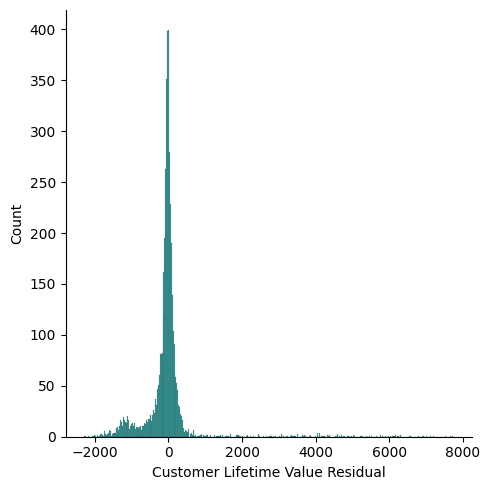

In [65]:
df_compare = df_new.copy()
df_compare['Customer Lifetime Value Prediction'] = model_after_tuning.predict(x)

df_compare['Customer Lifetime Value Residual'] = df_compare['Customer Lifetime Value'] - df_compare['Customer Lifetime Value Prediction']

sns.displot(df_compare['Customer Lifetime Value Residual'], color = 'teal')

Ada hampir 400 nasabah yang diprediksi dengan tepat. Lainnya masih menyisakan residu yang bervariasi.

In [66]:
df_compare['Customer Lifetime Value Residual'].describe()

count    4600.000000
mean       -8.134691
std       857.915051
min     -2289.707007
25%      -148.423722
50%       -26.789385
75%        60.154894
max      7740.240928
Name: Customer Lifetime Value Residual, dtype: float64

## Model Limitations
1. Model kurang mampu memprediksi nilai Customer Lifetime Value > 8000 dengan tepat.
1. Model dilatih dengan data Customer Lifetime Value 0 - 16589.
1. Belum ada data durasi seseorang menjadi nasabah asuransi.
1. Belum data ada jumlah kendaraan yang dimiliki nasabah asuransi.

## Business Impact after Implementation
1. 20% nasabah dengan 1 polis uplift ke 2 polis menurunkan Total Claim Amount -3924 atau -2.2%.
1. 20% nasabah dengan Coverage - Basic uplift ke Coverage - Basic menaikkan revenue +15299 atau +31.9%.
1. 20% nasabah dengan Renew Offer Type Offer2, Offer3, dan Offer4 uplift ke Offer 1 menaikkan revenue +8251 atau +15.7%.

## Conclusions
### Model
1. XG Boost dipilih karena hasil evaluasi paling baik. Setelah tuning model mencatat RMSE 851.12 MAE 344.54 MAPE 0.04. Artinya hasil prediksi punya kemungkinan eror sebesar 4.42%.
1. Model mampu memprediksi nasabah dengan nilai Customer Lifetime Value < 8000 dengan tepat.
1. Income tidak berpengaruh pada Customer Lifetime Value tapi premi bulanan berpengaruh paling kuat, dibuktikan dengan hasil uji korelasi sebesar 0.42.

### Business
1. Nasabah dengan > 1 polis asuransi punya nilai Customer Lifetime Value lebih tinggi.
1. Nasabah dengan 2 polis punya kecenderungan melakukan klaim lebih sedikit dibanding nasabah dengan 1 polis.
1. Perusahaan bisa menaikkan potensi revenue dengan uplift Coverage dan Renew Offer Type.

## Recommendations
### Model
1. Utamakan penggunaan model untuk memprediksi nasabah dengan Customer Lifetime Value < 8000 dan hindari memprediksi Customer Lifetime Value > 8000.
1. Perusahaan perlu menambah data seperti durasi nasabah berlangganan asuransi dan jumlah kendaraan seorang nasabah untuk mengurangi limitasi pada model.


### Business
1. Marketing difokuskan dengan uplift nasabah:
    * Nasabah dengan 1 polis menjadi 2 polis ada potensi efisiensi Total Claim Amout $9.77 per nasabah.
    * Nasabah dengan Coverage Basic menjadi Extended ada potensi kenaikan revenue $12 per nasabah.
    * Nasabah dengan Renew Offer Type 2, 3, dan 4 menjadi 1 ada potensi kenaikan revenue $11 - $16 per nasabah.
1. Program retensi dan loyalty pada nasabah dengan Customer Lifetime Value > 8000.

## Apendix

Menyimpan model machine learning.

In [ ]:
import pickle

model_after_tuning.fit(x,y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Vehicle Class',
                                                   'Employment Status',
                                                   'Marital Status']),
                                                 ('coverage_ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None        0
Basic       1
Extended    2
Premium     3
dtype: int64}]),
                                                  ['Coverage']),
                                                 ('renew_offer_type_o...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.005,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, random_state=1919, ...))])

In [ ]:
pickle.dump(model_after_tuning, open('Customer Lifetime Value Estimator.sav', 'wb'))

Mengakses model machine learning.

In [ ]:
load_model = pickle.load(open('Customer Lifetime Value Estimator.sav', 'rb'))